In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import pinv 
import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2
import os 

print(os.listdir())
os.chdir('../')
print(os.listdir())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['.DS_Store', 'env.py', 'LinUCB.py', '__pycache__', 'policies', 'README.md', '.gitignore', 'utils.py', 'simulator.py', 'init.py', '.git', 'Notebooks']
['.DS_Store', 'supplementary_NIPS.pdf', 'PF-D-LinUCB', '9372-weighted-linear-bandits-for-non-stationary-environments.pdf', 'supplementary_NIPS 2.pdf']


In [4]:
from policies.Random import RandomPolicy
from policies.LinUCB import LinUCB
from simulator import Simulator
from env import EnvLinear
from utils import action_check, data_generation, plot_regret

<h2 >Random Policy </h2>

In [32]:
d = 2
#delta = 0.95
k = 2
name = 'Random Policy'
seed_alg = 1
n_steps = 5000

env = EnvLinear(d,k,env_type="stationnary")
model = RandomPolicy(d,name=name)

all_regrets_random = []
for t in range(n_steps):
    a_list = env.get_action_set()
    action = model.choose_a(a_list)
    reward = env.get_reward(action)
    best_reward = env.get_best_choice()[1]
    model.update(reward)
    all_regrets_random.append(best_reward-reward)

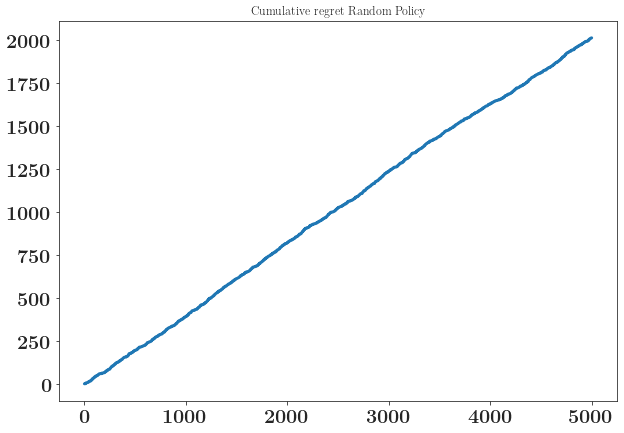

In [33]:
cum_regret_random = np.cumsum(all_regrets_random)
plt.figure(figsize=(10,7))
plt.title("Cumulative regret Random Policy")
plt.plot(cum_regret_random)

<h2>  LinUCB Sanity Check </h2>

In [53]:
d = 5
delta = 0.05
k = 10
name = ''
seed_alg = 100
n_steps = 50000

env = EnvLinear(d, k, env_type="stationnary")
model = LinUCB(d, name = name, seed_alg = seed_alg, param = {}, delta=delta)

all_regrets_linucb = []
for t in tqdm.tqdm(range(n_steps)):
    a_list = env.get_action_set()
    action = model.choose_a(a_list)
    reward = env.get_reward(action) 
    best_reward = env.get_best_choice()[1]
    model.update(reward+np.random.normal())
    all_regrets_linucb.append(best_reward-reward)

100%|██████████| 50000/50000 [00:37<00:00, 1340.68it/s]


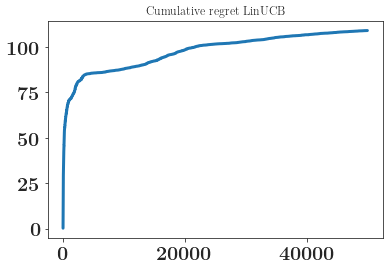

In [54]:
# d=5 k=10
cum_regret_linucb = np.cumsum(all_regrets_linucb)
plt.title("Cumulative regret LinUCB")
plt.plot(cum_regret_linucb)

## SW-LinUCB

## D-LinUCB

## PD-D-LinUCB

# Probleme en dimension 2 en tout cas checker avec BSN

# Simulator Check

In [12]:
d = 10
delta = 0.05
epsilon = 0.98
k = 5
name = ''
seed_alg = 1
seed_alg2 = 2
n_steps = 5000

env = EnvLinear(d, k, env_type="stationnary")
model1 = RandomPolicy(d, seed_alg2)
model2 = LinUCB(d, name, seed_alg, {}, delta)
model3 = TSNoWeights(d, epsilon)
model = [model1, model2, model3]


simu = Simulator(env, model, k, d, steps=1000, verbose=False, param={})

TypeError: Cannot cast array from dtype('O') to dtype('int64') according to the rule 'safe'

In [7]:
avg_r, q_r, Q_r, time_, avg_cum_b_a, q_b_a, Q_b_a, _ = simu.run_exp(n_steps, 1, 5, seed_tot = 3)

100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

--- Data built ---


In [8]:
print(avg_r)
print(q_r)
print(Q_r)
print(time_)
print(avg_cum_b_a)

{'Random': array([1.77072230e-01, 8.02383284e-01, 1.80359052e+00, ...,
       1.86703341e+03, 1.86709728e+03, 1.86781611e+03]), 'LinUCB': array([ 0.32143729,  0.64943504,  1.17659096, ..., 70.1121938 ,
       70.1121938 , 70.1121938 ]), 'TS': array([  0.30601583,   0.8986747 ,   1.53224737, ..., 230.83680495,
       230.83680495, 230.83680495])}
{'Random': array([1.77072230e-01, 8.02383284e-01, 1.80359052e+00, ...,
       1.86703341e+03, 1.86709728e+03, 1.86781611e+03]), 'LinUCB': array([ 0.32143729,  0.64943504,  1.17659096, ..., 70.1121938 ,
       70.1121938 , 70.1121938 ]), 'TS': array([  0.30601583,   0.8986747 ,   1.53224737, ..., 230.83680495,
       230.83680495, 230.83680495])}
{'Random': array([1.77072230e-01, 8.02383284e-01, 1.80359052e+00, ...,
       1.86703341e+03, 1.86709728e+03, 1.86781611e+03]), 'LinUCB': array([ 0.32143729,  0.64943504,  1.17659096, ..., 70.1121938 ,
       70.1121938 , 70.1121938 ]), 'TS': array([  0.30601583,   0.8986747 ,   1.53224737, ..., 230.836

In [9]:
data, time_d = data_generation(5, simu, n_steps, 5, seed_alg)

100%|██████████| 5/5 [00:13<00:00,  2.79s/it]

--- Data built ---


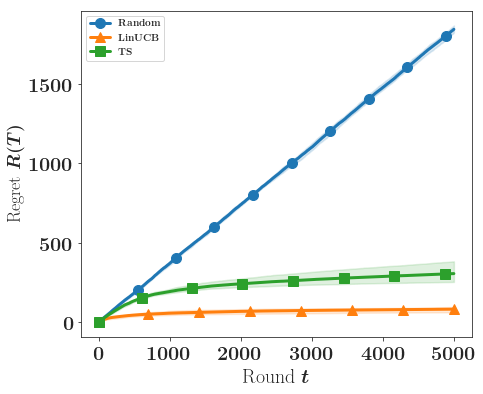

0

In [11]:
plot_regret(data, qtl = 5)

# Reproducibility check

In [3]:
d = 10
delta = 0.05
epsilon = 0.98
k = 5
name = ''
n_steps = 5000

env = EnvLinear(d, k, env_type="stationnary")
model1 = RandomPolicy(d)
model2 = LinUCB(d)
model3 = TSNoWeights(d, epsilon)
model = [model1, model2, model3]
simu = Simulator(env, model, k, d, steps=1000, verbose=False, param={})

In [4]:
_, _, _, _, _, _, _, cum_1 = simu.run_exp(n_steps, 3, 5, seed_tot = 3)
data, time_dic = data_generation(3, simu, n_steps, 5, seed_tot=3, t_saved=None)

  0%|          | 0/3 [00:00<?, ?it/s]

--- Data built ---


100%|██████████| 3/3 [00:22<00:00,  7.34s/it]

--- Data built ---


In [5]:
d = 10
delta = 0.05
epsilon = 0.98
k = 5
name = ''
seed_alg = 1
seed_alg2 = 2
n_steps = 5000

env = EnvLinear(d, k, env_type="stationnary")
model1 = RandomPolicy(d)
model2 = LinUCB(d)
model3 = TSNoWeights(d, epsilon)
model = [model1, model2, model3]
simu = Simulator(env, model, k, d, steps=1000, verbose=False, param={})

In [6]:
_, _, _, _, _, _, _, cum_2 = simu.run_exp(n_steps, 3, 5, seed_tot = 3)
data_2, time_dic2 = data_generation(3, simu, n_steps, 5, seed_tot=3, t_saved=None)

  0%|          | 0/3 [00:00<?, ?it/s]

--- Data built ---


100%|██████████| 3/3 [00:13<00:00,  4.51s/it]

--- Data built ---


In [7]:
# Same result for the same experiment of the same Monte Carlo Scheme
for n_exp in range(3):
    print(cum_1['Random'][n_exp][-10:] == cum_2['Random'][n_exp][-10:])
    print('--')
    print(cum_1['LinUCB'][n_exp][-10:] == cum_2['LinUCB'][n_exp][-10:])
    print('--')
    print(cum_1['TS'][n_exp][-10:] == cum_2['TS'][n_exp][-10:])
    print('--')

[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--
[ True  True  True  True  True  True  True  True  True  True]
--


In [8]:
# Different results for different Monte Carlo repetitions ?
print(cum_1['Random'][0][-10:] == cum_1['Random'][1][-10:])
print(cum_2['Random'][0][-10:] == cum_2['Random'][1][-10:])
print('--')

print(cum_1['LinUCB'][0][-10:] == cum_1['LinUCB'][1][-10:])
print(cum_2['LinUCB'][0][-10:] == cum_2['LinUCB'][1][-10:])
print('--')

print(cum_1['TS'][0][-10:] == cum_1['TS'][1][-10:])
print(cum_2['TS'][0][-10:] == cum_2['TS'][1][-10:])
print('--')

[False False False False False False False False False False]
[False False False False False False False False False False]
--
[False False False False False False False False False False]
[False False False False False False False False False False]
--
[False False False False False False False False False False]
[False False False False False False False False False False]
--


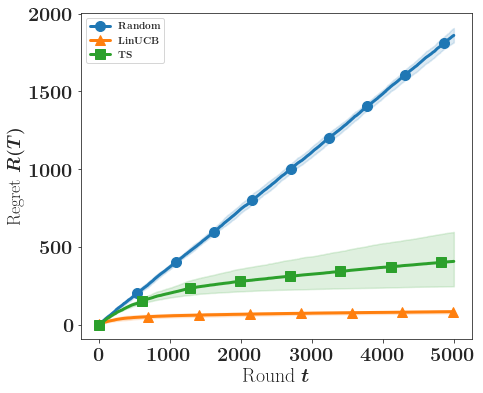

0

In [9]:
plot_regret(data, qtl = 5)

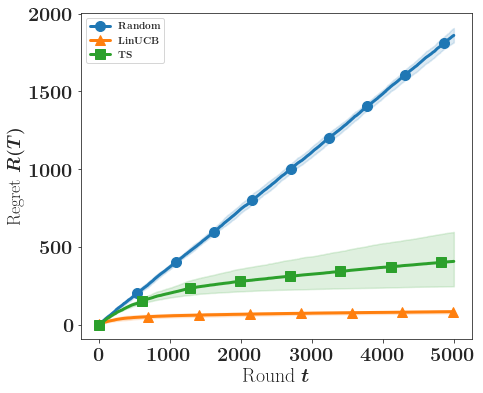

0

In [10]:
plot_regret(data_2, qtl=5)

# Checking the distribution of the noise.

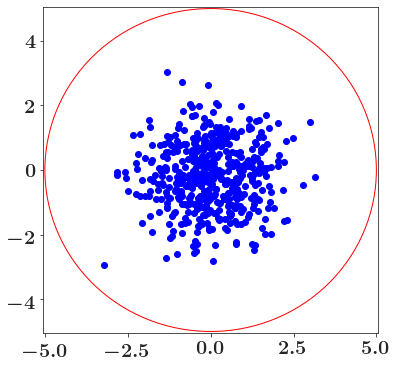

In [11]:
list_noise = np.random.normal(scale=1, size = (500,2))
action_check(list_noise, L= 5)